In [1]:
#Standard setup
import pandas as pd
import numpy as np

#Part A. MovieLens Exploration using Pandas

MovieLens Exploration using Pandas Use the Movielens data. There is a large dataset with 25M ratings, we will use 100k ratings.

In [2]:
!curl -o ml-latest-small.zip http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
# backup location
#!curl -o ml-latest-small.zip http://www.dcs.gla.ac.uk/~craigm/recsysHM/ml-latest-small.zip

!unzip -o ml-latest-small.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  955k  100  955k    0     0  2445k      0 --:--:-- --:--:-- --:--:-- 2443k
Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


Let's look into the files using Pandas:

In [3]:
ratings_df = pd.read_csv("ml-latest-small/ratings.csv")
movies_df = pd.read_csv("ml-latest-small/movies.csv")

# we're going to treat userId as strings, and similarly as movies. This will prevent confusion later on.
ratings_df['userId'] = "u" + ratings_df['userId'].astype(str)
ratings_df['movieId'] = "m" + ratings_df['movieId'].astype(str)
movies_df['movieId'] = "m" +  movies_df['movieId'].astype(str)

In [4]:
ratings_df

,userId,movieId,rating,timestamp
0,u1,m1,4.0,964982703
1,u1,m3,4.0,964981247
2,u1,m6,4.0,964982224
3,u1,m47,5.0,964983815
4,u1,m50,5.0,964982931
...,...,...,...,...
100831,u610,m166534,4.0,1493848402
100832,u610,m168248,5.0,1493850091
100833,u610,m168250,5.0,1494273047
100834,u610,m168252,5.0,1493846352


`ratings_df` is a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Viewing it, we can see users (identified by userId) are rating various movies (cf. movieId).

We can slice and dice the dataframes, e.g.:

 * project a single column (this returns a [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)).

In [5]:
movies_df["title"]

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

 - project multiple columns (this returns a view of the original DataFrame, as another DataFrame object).

In [6]:
movies_df[["movieId", "title"]]

,movieId,title
0,m1,Toy Story (1995)
1,m2,Jumanji (1995)
2,m3,Grumpier Old Men (1995)
3,m4,Waiting to Exhale (1995)
4,m5,Father of the Bride Part II (1995)
...,...,...
9737,m193581,Black Butler: Book of the Atlantic (2017)
9738,m193583,No Game No Life: Zero (2017)
9739,m193585,Flint (2017)
9740,m193587,Bungo Stray Dogs: Dead Apple (2018)


 - Select rows based on one or more conditions

In [7]:
ratings_df[(ratings_df["userId"] == 'u500') & (ratings_df["rating"] == 1)]

,userId,movieId,rating,timestamp
79908,u500,m11,1.0,1005528017
79909,u500,m39,1.0,1005527926
79910,u500,m101,1.0,1005527980
79915,u500,m231,1.0,1005528039
79923,u500,m449,1.0,1005528017
79924,u500,m471,1.0,1005528017
79926,u500,m539,1.0,1005527980
79931,u500,m597,1.0,1005527980
79934,u500,m745,1.0,1005528205
79939,u500,m1188,1.0,1005528065


How many users are there in this dataset?


In [8]:
total_users = len(pd.unique(ratings_df["userId"]))

print(total_users)


610


Average rating of each user


In [9]:
user_ratings = ratings_df[["userId", "rating"]]
avg_ratings = user_ratings.groupby("userId").mean()

avg_ratings=avg_ratings.reset_index()
avg_ratings[(avg_ratings["userId"]=='u200')]


,userId,rating
113,u200,3.80988


The average count of ratings per-user

In [10]:
count = user_ratings.groupby(['userId']).count()
avg_count = count["rating"].mean()
avg_count

165.30491803278687

### Analysing users's preferences.

Let's try something else. We can see what movies a given user has rated by "merging" the two dataframes - this equates to a JOIN in SQL. Let's do this for userId 556.


In [20]:
pd.merge(
    ratings_df[ratings_df["userId"]=='u556'],
    movies_df,
    on=["movieId"]).sort_values(by="rating", ascending=False)

,userId,movieId,rating,timestamp,title,genres
0,u556,m588,5.0,1534321062,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
2,u556,m4896,5.0,1534320962,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy
27,u556,m112852,5.0,1534321287,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi
21,u556,m76093,5.0,1534320965,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX
3,u556,m4993,4.5,1534320935,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
4,u556,m5816,4.5,1534320982,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy
23,u556,m88125,4.5,1534320986,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
13,u556,m49649,4.5,1534321075,Eragon (2006),Action|Adventure|Fantasy
18,u556,m72998,4.0,1534321171,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
30,u556,m162600,4.0,1534321200,Miss Peregrine's Home for Peculiar Children (2...,Fantasy


It appears that this user is interested in adventure/fantasies movies.

NB: If the columns we are joining on dont have the same name, we can specify `left_on` and `right_on` attributes.

**Analysing movie categories**

Lets examine two particular users a bit more, u556 and u7.

 - How many movies with "Fantasy" genre have u556 rated positively ($\geq 4$)?

 - How many movies with "Fantasy" genre have u7 rated positively ($\geq 4$)?

 - Consider all of u556's ratings. What percentage of all these ratings are positive ratings ($\geq 4$) and are for movies belonging to the "Fantasy" genre?


In [21]:
# def merge_user_movies(user):
  # u = pd.merge(
  #   ratings_df[ratings_df["userId"] == user],
  #   movies_df,
  #   on=["movieId"]).sort_values(by="rating", ascending=False)
  # return u

user556 = pd.merge(
    ratings_df[ratings_df["userId"]=='u556'],
    movies_df,
    on=["movieId"]).sort_values(by="rating", ascending=False)

user7 = pd.merge(
    ratings_df[ratings_df["userId"]=='u7'],
    movies_df,
    on=["movieId"]).sort_values(by="rating", ascending=False)


def count_fantasy_liked(user_dataset):
  filtered_dataset = user_dataset[user_dataset['genres'].str.contains('Fantasy', case=False) & (user_dataset['rating'] >= 4)]
  count = filtered_dataset.shape[0]
  return count

u556_fantasy = count_fantasy_liked(user556)
u7_fantasy = count_fantasy_liked(user7)

total_ratings = user556.shape[0]
#below .mean() treats dataframe as booleans, so we can apply it to efficiently calculate amount.
u556_percentage = (u556_fantasy / total_ratings) * 100


print(u556_fantasy)
print(u7_fantasy)
print(u556_percentage)


22
11
68.75


## Popularity-based Recomendation

Now let's examine the ratings of movies.

We can get a dataframe containing the number of times a movie has been rated by applying a groupby and aggregation of the ratings_df.


In [22]:
groupingCountSeries = ratings_df[["movieId", "rating"]].groupby(["movieId"]).count()
rating300 = groupingCountSeries[groupingCountSeries.rating >= 300]

groupingCountSeries[groupingCountSeries.rating<25]


,rating
movieId,
m100,14
m100044,1
m100068,1
m100083,3
m100106,1
...,...
m99853,1
m999,12
m99910,2


Plot the distribution of movie ratings.

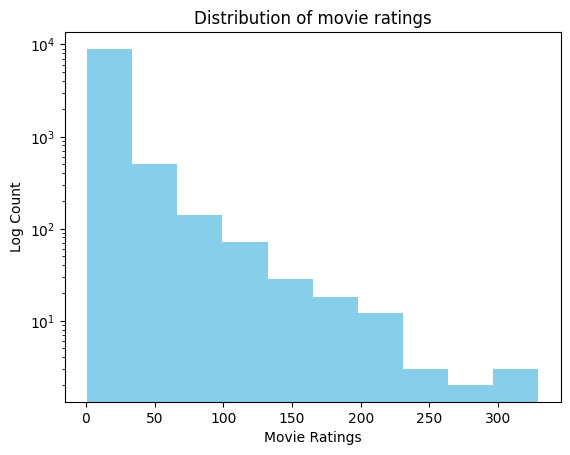

In [14]:
import matplotlib.pyplot as plt

plt.hist(groupingCountSeries['rating'], log=True, color='skyblue')

plt.xlabel('Movie Ratings')
plt.ylabel('Log Count')
plt.title('Distribution of movie ratings')

plt.show()



Find the names of *all* of the movies that have the highest *average* ratings


In [15]:
num_rating = ratings_df.groupby("movieId")['rating'].count()
avg_rating = ratings_df.groupby("movieId")['rating'].mean()

merged = pd.merge(avg_rating, num_rating, left_index=True, right_index=True, suffixes=('_mean', '_count'))
merged_final = pd.merge(merged, movies_df[["movieId", "title"]], left_index=True, right_on="movieId").set_index('movieId')

merged_final = merged_final.sort_values(by='rating_mean', ascending=False)
merged_final = merged_final.reset_index()

# merged_final
(merged_final[(merged_final['rating_mean'] == 5)])
# merged_final[(merged_final['movieId'] == 'm6442')]


,movieId,rating_mean,rating_count,title
0,m167064,5.0,1,I Am Not Your Negro (2017)
1,m138966,5.0,1,Nasu: Summer in Andalusia (2003)
2,m53578,5.0,1,"Valet, The (La doublure) (2006)"
3,m139640,5.0,1,Ooops! Noah is Gone... (2015)
4,m79897,5.0,1,Get Low (2009)
...,...,...,...,...
291,m8804,5.0,1,"Story of Women (Affaire de femmes, Une) (1988)"
292,m96608,5.0,1,Runaway Brain (1995)
293,m25947,5.0,1,Unfaithfully Yours (1948)
294,m59814,5.0,1,Ex Drummer (2007)


#Association Rules and Lift

Lets take all of the positive ratings (4 or 5) to find the most popular pairs of movies that users have watched. We'll consider these are "successful movie watches" of these users.




In [23]:
positives = ratings_df[ratings_df["rating"]>=4]


# join positives with itself on userId to get all distinct pairs of movies watched by a given user.
pairs = pd.merge(positives, positives, on=["userId"])
pairs = pairs[ pairs["movieId_x"] != pairs["movieId_y"] ]

# we only want A->B, not B->A. Use the timestamps to restrict the selected pairs such that
# one movie is rated after the other movie, OR if the timestampes are tied, we break such
# a tie by movieId. Bitwise operators & and | are used for combining Pandas series containing booleans
sequences = pairs[
                  (pairs["timestamp_x"] < pairs["timestamp_y"])
                  |
                  (
                      (pairs["timestamp_x"] == pairs["timestamp_y"])
                      &
                      (pairs["movieId_x"] < pairs["movieId_y"])
                  )
                  ]

# lets count the frequency of each pair of movies. As a user can only rate a movie once, you can
# also think of this as the number of users that have watched each pair of movies.
paircounts = sequences[["movieId_x", "movieId_y", "userId"]].groupby(["movieId_x", "movieId_y"]).count()

# sort by the most popular pairs.
pairswithcounts = paircounts.reset_index().rename(columns={"userId" : "count"}).sort_values(['count'], ascending=False)

# display the top most frequent pairs
pairswithcounts.head()

,movieId_x,movieId_y,count
1579647,m318,m356,112
1580428,m318,m527,98
1421549,m296,m593,95
1420937,m296,m47,92
1191679,m260,m1196,91


Display the titles of the (most popular) movie pairs from `pairswithcounts`

In [17]:
# movies_df = movies_df[["movieId", "title"]]

#merge pairswithcounts dataframe with movies dataframe so that we get new column title_x corresponding to movieId_x
pairswithcounts_titles = pd.merge(pairswithcounts, movies_df, left_on='movieId_x', right_on='movieId').drop(columns='movieId')
pairswithcounts_titles = pairswithcounts_titles.rename(columns={"title": "title_x"})

#doing the same as above but with new dataframe to get new column title_y corresponding to movieId_y
pairswithcounts_titles = pd.merge(pairswithcounts_titles, movies_df, left_on='movieId_y', right_on='movieId').drop(columns='movieId')
pairswithcounts_titles = pairswithcounts_titles.rename(columns={"title": "title_y"})

#sorting so that the pairs of movies with biggest count are first
pairswithcounts_titles = pairswithcounts_titles.sort_values(['count'], ascending=False)

#dropping column corresponding to genres as we need only titles
pairswithcounts_titles_final = pairswithcounts_titles.drop(['genres_x', 'genres_y'], axis=1)

pairswithcounts_titles_final.head()


# pairswithcounts_titles[(pairswithcounts_titles['count'] == 74)]

,movieId_x,movieId_y,count,title_x,title_y
0,m318,m356,112,"Shawshank Redemption, The (1994)",Forrest Gump (1994)
2141,m318,m527,98,"Shawshank Redemption, The (1994)",Schindler's List (1993)
4194,m296,m593,95,Pulp Fiction (1994),"Silence of the Lambs, The (1991)"
17826,m296,m47,92,Pulp Fiction (1994),Seven (a.k.a. Se7en) (1995)
24736,m260,m1196,91,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back...


Calculate Lift for all pairs in `paircounts`.  



In [24]:
 #dataframe with movies that have only posirive ratings
positives = ratings_df[ratings_df["rating"]>=4]

#group regarding movieId so we get count of positive ratings for all movies
positive_rating_count = positives.groupby('movieId')['rating'].count().reset_index(name='ratingCount')

#merge the dataframe we created earlir (with pairs of movies) with positive_rating_count to create column "ratingCount_x
pairswithcounts_rating_x = pd.merge(pairswithcounts_titles, positive_rating_count, left_on='movieId_x', right_on='movieId').drop(columns='movieId')
pairswithcounts_rating_x = pairswithcounts_rating_x.rename(columns={"ratingCount": "ratingCount_x"})

#merge one morre time, but now pairswithcounts_rating_x with  positive_rating_count to create column "ratingCount_y
pairswithcounts_rating_y = pd.merge(pairswithcounts_rating_x, positive_rating_count, left_on='movieId_y', right_on='movieId').drop(columns='movieId')
pairswithcounts_rating_y = pairswithcounts_rating_y.rename(columns={"ratingCount": "ratingCount_y"})

#calculate lift according to formula, taking the value total_users we defined in Task 1 as total number of users and thus using it to calculate probabilities
pairswithcounts_rating_y['lift'] = (pairswithcounts_rating_y['count'] / total_users) / ((pairswithcounts_rating_y['ratingCount_x'] / total_users) * (pairswithcounts_rating_y['ratingCount_y'] / total_users))

#sort lifts in descending order
pairswithcounts_rating_y = pairswithcounts_rating_y.sort_values(by='lift', ascending=False)

pairswithcounts_rating_y

# pairswithcounts_rating_y[(pairswithcounts_rating_y['movieId_x'] == 'm91500') & (pairswithcounts_rating_y['movieId_y'] == 'm106487')]


,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,ratingCount_x,ratingCount_y,lift
3540436,m130490,m114265,1,Insurgent (2015),Action|Sci-Fi|Thriller,Laggies (2014),Comedy|Romance,1,1,610.000000
2742149,m96084,m26158,1,Hands Over the City (Le mani sulla città) (1963),Drama,Closely Watched Trains (Ostre sledované vlaky)...,Comedy|Drama|War,1,1,610.000000
2742339,m109633,m26150,1,"Garden of Words, The (Koto no ha no niwa) (2013)",Animation|Romance,Andrei Rublev (Andrey Rublyov) (1969),Drama|War,1,1,610.000000
2742338,m32892,m26150,1,Ivan's Childhood (a.k.a. My Name is Ivan) (Iva...,Drama|War,Andrei Rublev (Andrey Rublyov) (1969),Drama|War,1,1,610.000000
2742337,m126090,m26150,1,Hedgehog in the Fog (1975),Animation,Andrei Rublev (Andrey Rublyov) (1969),Drama|War,1,1,610.000000
...,...,...,...,...,...,...,...,...,...,...
222842,m2959,m161,1,Fight Club (1999),Action|Crime|Drama|Thriller,Crimson Tide (1995),Drama|Thriller|War,179,57,0.059786
10993,m329,m296,1,Star Trek: Generations (1994),Adventure|Drama|Sci-Fi,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,42,244,0.059524
938968,m2959,m349,1,Fight Club (1999),Action|Crime|Drama|Thriller,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,179,58,0.058756
3120473,m80463,m318,1,"Social Network, The (2010)",Drama,"Shawshank Redemption, The (1994)",Crime|Drama,38,274,0.058586


It should be clear that these lift pairs **do not have high support**.

### Support Thresholds


We can make more meaningful recommendations using Lift if we apply a Support threshold. For instance, we can remove movie pairs with support count $< 10$.

So in essence, we can use lift to identify highly co-occurring movie pairs without resorting to any collaborative notions.

In [19]:
sup_threshold = 10

sup_threshold_pairs = pairswithcounts_rating_y[pairswithcounts_rating_y['count'] >= sup_threshold]

sup_threshold_pairs

# sup_threshold_pairs[(sup_threshold_pairs['movieId_x'] == 'm364') & (sup_threshold_pairs['movieId_y'] == 'm362')]



,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,ratingCount_x,ratingCount_y,lift
1037652,m91500,m116823,11,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,The Hunger Games: Mockingjay - Part 1 (2014),Adventure|Sci-Fi|Thriller,24,15,18.638889
981256,m91500,m106487,10,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,The Hunger Games: Catching Fire (2013),Action|Adventure|Sci-Fi|IMAX,24,14,18.154762
607892,m115713,m139385,10,Ex Machina (2015),Drama|Sci-Fi|Thriller,The Revenant (2015),Adventure|Drama,20,19,16.052632
829323,m91658,m67255,10,"Girl with the Dragon Tattoo, The (2011)",Drama|Thriller,"Girl with the Dragon Tattoo, The (Män som hata...",Crime|Drama|Mystery|Thriller,24,19,13.377193
862831,m34162,m8807,10,Wedding Crashers (2005),Comedy|Romance,Harold and Kumar Go to White Castle (2004),Adventure|Comedy,25,19,12.842105
...,...,...,...,...,...,...,...,...,...,...
15424,m457,m2571,13,"Fugitive, The (1993)",Thriller,"Matrix, The (1999)",Action|Sci-Fi|Thriller,137,222,0.260735
3120283,m1206,m318,10,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller,"Shawshank Redemption, The (1994)",Crime|Drama,86,274,0.258869
3120268,m364,m318,13,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,"Shawshank Redemption, The (1994)",Crime|Drama,115,274,0.251666
10804,m457,m296,13,"Fugitive, The (1993)",Thriller,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,137,244,0.237226


I got the "The Hunger Games (2012)" paired with "The Hunger Games: Mockingjay - Part 1 (2014)" as the movie pair with the highest lift. This seems a good pairing.